# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [125]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 math

How many years of data are logged in our dataset? 

In [126]:
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [127]:
mich_score = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean()
ohio_score = df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean()
print("Michigan:", mich_score)
print("Ohio:", ohio_score)

Michigan: 234.36363636363637
Ohio: 239.45454545454547


Find the average for your outcome score across all states in 2019

In [128]:
score = df[df["YEAR"] == 2019]["AVG_MATH_4_SCORE"].mean()
score

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [129]:
df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [86]:
df["expenditure_per_student"] = df["TOTAL_EXPENDITURE"]/df["GRADES_ALL_G"]
df["revenue_per_student"] = df["TOTAL_REVENUE"]/df["GRADES_ALL_G"]
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,expenditure_per_student,revenue_per_student
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221,3.661510
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,7.939520,8.568999
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774,4.837699
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044,3.877685
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536,4.997299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,NaN


Feature engineering justification: I made a column for expenditure per student to see if the amount the state spends is correlated with academic performance, like how the example said. Similarly, i also made a column for revenue per student because I thought the state's revenue could also affect their performance, since the more funding there is, the better resources, facilities, and programs the state can provide the schools, which could lead to better academic performance.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

In [50]:
#grouping by year, and getting averages of scores and expenditures of the states
math_avg_by_year = df.groupby("YEAR")["AVG_MATH_4_SCORE"].mean()
expenditure_avg_by_year = df.groupby("YEAR")["TOTAL_EXPENDITURE"].mean()
#convert to dataframe
data = {"math_avg_by_year": math_avg_by_year, "expenditure_avg_by_year": expenditure_avg_by_year}
avgs = pd.DataFrame(data).dropna()
#reset from YEAR index
avgs = avgs.reset_index()
avgs.head(2)

,YEAR,math_avg_by_year,expenditure_avg_by_year
0,1992,218.418605,4.653591e+06
1,1996,224.000000,5.838049e+06


Text(0.5, 1.0, 'Avg math 4 score and avg expenditure vs year')

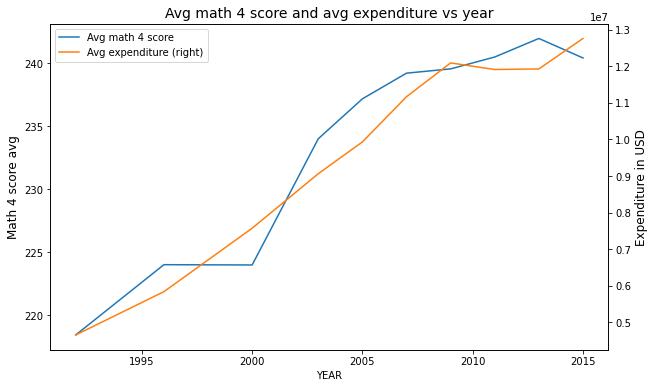

In [56]:
#plotting scores, expenditure against year
plt.figure(figsize=(10,6))
axes = plt.gca()

avgs.plot(x="YEAR", y="math_avg_by_year", kind="line", label="Avg math 4 score", ax=axes)
plt.ylabel("Math 4 score avg", fontsize=12)
avgs.plot(x="YEAR", y="expenditure_avg_by_year", kind="line", label="Avg expenditure", ax=axes, secondary_y=True)
plt.ylabel("Expenditure in USD", fontsize=12)
plt.title("Avg math 4 score and avg expenditure vs year", fontsize=14)

Lineplot showing average math score of 4th graders and the average expenditure vs year <br>
There seems to be a slight correlation between the score and expenditure per student, since both show an increase with each other, but in between 1995 and 2000 the scores didn't get better while expenditure was increasing. Towards 2015, the scores decreased while expenditure was still increasing.

**Visualization 2**

Text(0.5, 1.0, 'avg reading 4 score vs avg math 4 score')

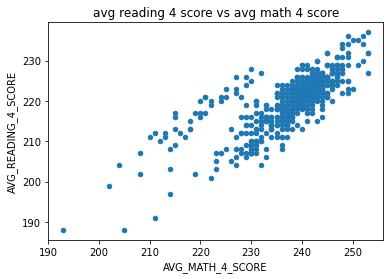

In [96]:
plt.figure(figsize=(6,4))
ax1=plt.gca()
df.plot(x="AVG_MATH_4_SCORE", y="AVG_READING_4_SCORE", kind="scatter", ax=ax1)
plt.title("avg reading 4 score vs avg math 4 score")

Scatterplot of average reading 4 scores vs average math 4 scores <br> 
There seems to be some correlation between math score and reading score of 4th graders. The math scores still do have some variation for each reading score, but there still shows some increase with math score as reading scores increase.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [67]:
from sklearn.model_selection import train_test_split

In [116]:
df1 = df[df[['YEAR', 'expenditure_per_student', 'revenue_per_student', 'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE']].notna().all(axis=1)]
X = df1[['YEAR','expenditure_per_student','revenue_per_student', 'AVG_READING_4_SCORE']]
y = df1["AVG_MATH_4_SCORE"]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [118]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [119]:
# create your model here
model = LinearRegression() 

In [120]:
model.fit(X_train, y_train)

LinearRegression()

In [121]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [122]:
print(model.score(X_test, y_test))
print("mean error", np.mean(y_pred-y_test))
print("mean absolute error", np.mean(np.abs(y_pred-y_test)))
print("root mean squared error", np.mean((y_pred-y_test)**2)**0.5)

0.8507186652156098
mean error 0.34895912374548177
mean absolute error 3.187525906111203
root mean squared error 4.053499407700845


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

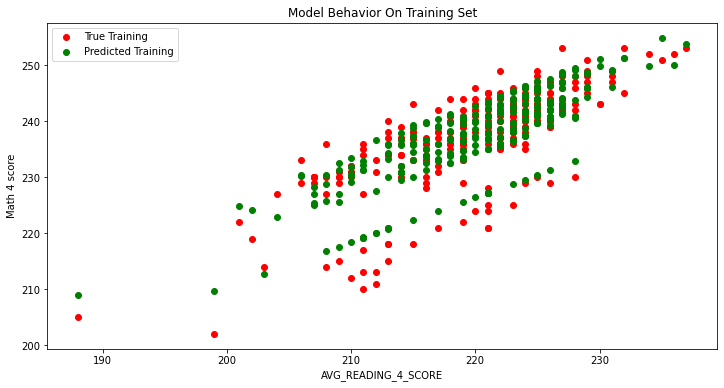

In [106]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

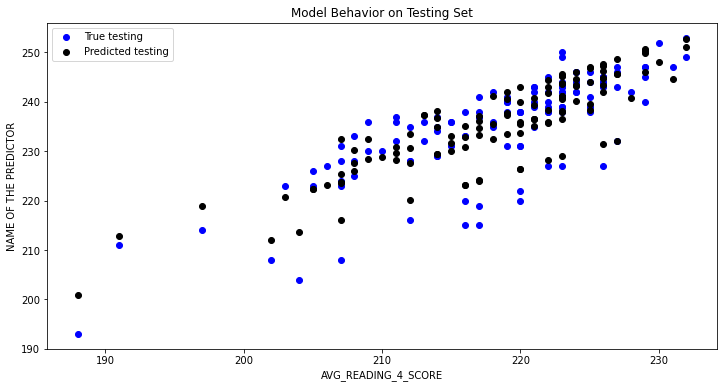

In [107]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

The variable I focused on was grade 4 math scores. I thought expenditure, revenue, and scores from a different subject would affect the math scores the most. For one of the graphs, I made a new dataframe of the states' averages of math 4 score and their expenditures per year by grouping by year and taking the means of math 4 score and total expenditure. The graph showed a possible positive correlation between math score and expenditure, but there were some years that didn't have scores increasing with an increase in expenditure. For another graph, I plotted 4th grade reading scores with 4th grade math scores and they seemed to have some correlation. I thought it would make sense that if a student scored high in one subject, they could probably score high in other subjects too. So I put expenditure, revenue, and reading 4 scores as the input data, and used a linear regression model. I think student performance can be predicted based on the amount of money the state uses for education, and their performance in other subjects.